## Evaluating the performance of a basic 1/n portfolio

In [9]:
!pip install requests pandas

In [10]:
pip install yfinance pandas numpy matplotlib

In [11]:
pip install statsmodels

In [4]:
pip install cufflinks seaborn pyfolio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.3 MB/s eta 0:00:00
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88656 sha256=9688194f5d4d5a72ff352636a734f34d02916ff579a4258178b21d977e2b6c79
  Stored in directory: /root/.cache/pip/wheels/71/38/bc/e53700cfd8b0ad6b539d2fbaaf060ed8a299e7622a5b86ef42
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39753 sha256=e06fd4e2a07d804800d3e17211c9cc1b924af7c9b415036145e27fbf700244b7
  Stored in directory: /root/.cache/pip/wheels/0e/2e/f2/d6d2d9a1eb8fbbd9949bb5d4c00f753e3b74e5bd7ed10b1d36
Successfully built pyfolio empyrical


In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import pyfolio as pf

/usr/local/lib/python3.10/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [6]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

[*********************100%***********************]  4 of 4 completed


Downloaded 1807 rows of data.


<Axes: title={'center': 'Stock prices of the considered assets'}, xlabel='Date'>

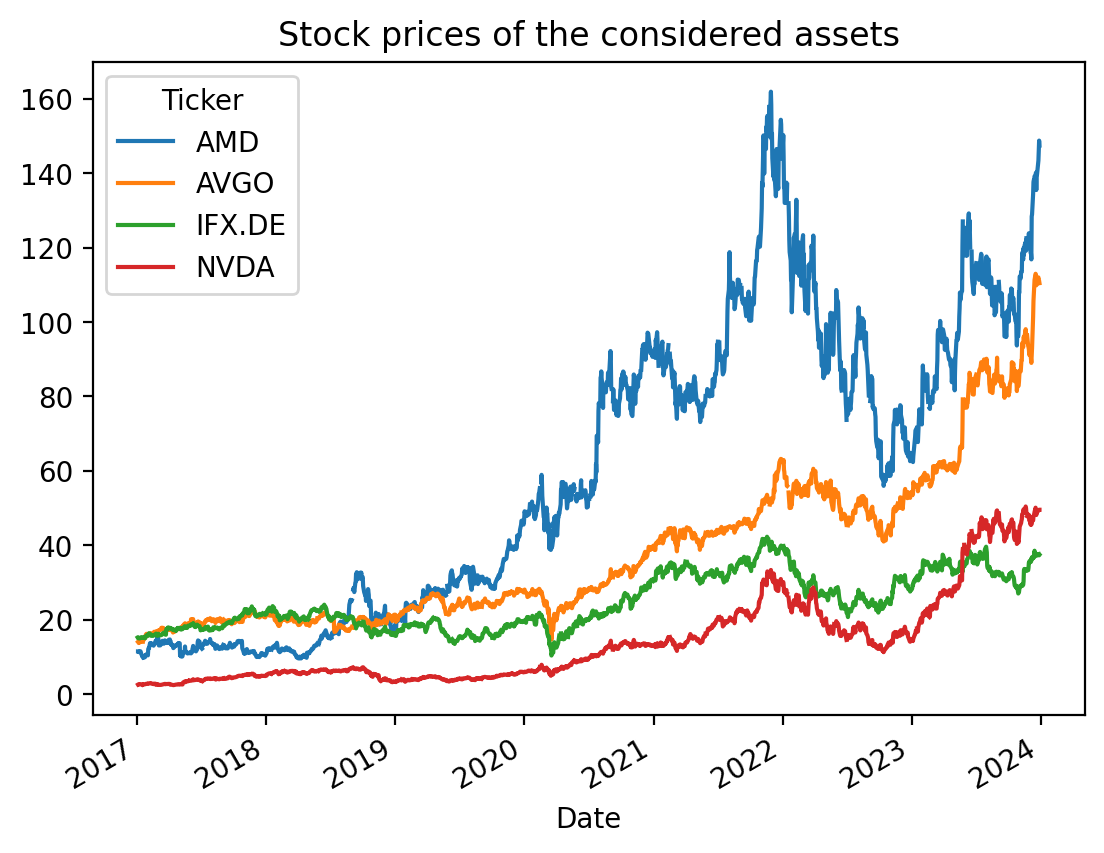

In [16]:
#Stock of Semiconductor Companies (Nvdia, Broadcom Inc., Advanced Micro Devices, and Infineon Technologies AG)
RISKY_ASSETS = ['NVDA', 'AVGO', 'AMD', 'IFX.DE']
START_DATE = '2017-01-01'
END_DATE = '2023-12-31'

n_assets = len(RISKY_ASSETS)

prices_df = yf.download(RISKY_ASSETS, start=START_DATE,
                       end=END_DATE)
#To get the adjusted close price, we use the 'Adj Close' column
prices_df = prices_df['Adj Close']
print(f'Downloaded {prices_df.shape[0]} rows of data.')
prices_df.plot(title='Stock prices of the considered assets')

In [17]:
!pip install tabulate

Downloaded 1807 rows of data.
+---------------------------+--------+----------+----------+-----------+
| Date                      |    AMD |     AVGO |   IFX.DE |      NVDA |
|---------------------------+--------+----------+----------+-----------|
| 2017-01-02 00:00:00+00:00 | nan    | nan      |  15.1889 | nan       |
| 2017-01-03 00:00:00+00:00 |  11.43 |  14.0041 |  15.2533 |   2.51307 |
| 2017-01-04 00:00:00+00:00 |  11.43 |  13.9044 |  15.0419 |   2.5717  |
| 2017-01-05 00:00:00+00:00 |  11.24 |  13.6853 |  14.9546 |   2.50642 |
| 2017-01-06 00:00:00+00:00 |  11.32 |  13.8667 |  14.9041 |   2.53992 |
| 2017-01-09 00:00:00+00:00 |  11.49 |  13.8966 |  14.9776 |   2.6429  |
| 2017-01-10 00:00:00+00:00 |  11.44 |  14.1792 |  15.1154 |   2.62294 |
| 2017-01-11 00:00:00+00:00 |  11.2  |  14.0889 |  15.1338 |   2.59067 |
| 2017-01-12 00:00:00+00:00 |  10.76 |  14.045  |  15.0235 |   2.5483  |
| 2017-01-13 00:00:00+00:00 |  10.58 |  14.1698 |  15.1889 |   2.54805 |
| 2017-01-16 00:00:00

<Axes: title={'center': 'Stock prices of the considered assets'}, xlabel='Date'>

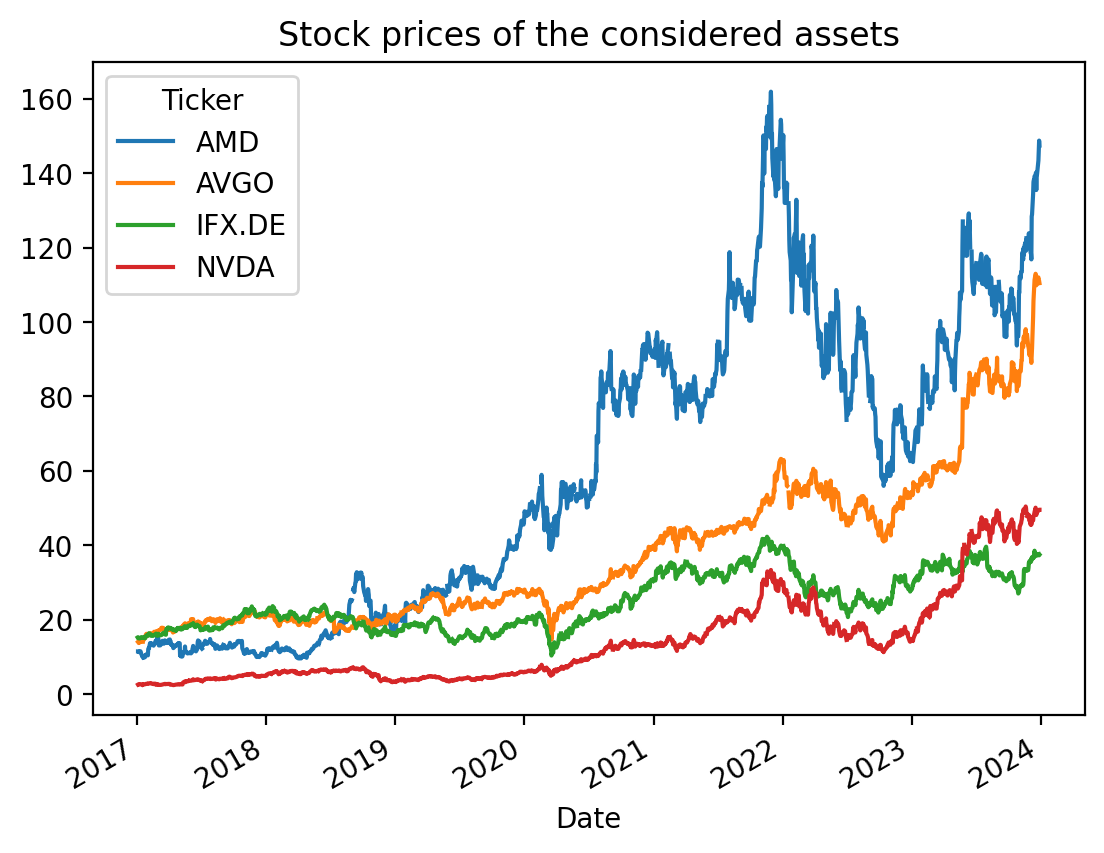

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

print(f'Downloaded {prices_df.shape[0]} rows of data.')

# Print the data in a table
print(tabulate(prices_df, headers='keys', tablefmt='psql')) # print using tabulate

prices_df.plot(title='Stock prices of the considered assets')

Calculate individual asset returns:

In [22]:
returns = prices_df['Adj Close'].pct_change(fill_method=None).dropna()

In [23]:
prices_df.fillna(method='ffill', inplace=True)  # Fill NA with previous value
returns = prices_df['Adj Close'].pct_change().dropna()

<ipython-input-23-df170432cecb>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prices_df.fillna(method='ffill', inplace=True)  # Fill NA with previous value


Define the Weights

In [24]:
portfolio_weights = n_assets * [1 / n_assets]

Calculate portfolio returns:

In [25]:
portfolio_returns = pd.Series(np.dot(portfolio_weights, returns.T),
                             index=returns.index)

Create the tear sheet (simple variant):

In [33]:
import pyfolio as pf
import pyfolio.timeseries as ts

# Check available attributes in timeseries
print(dir(ts))

['APPROX_BDAYS_PER_MONTH', 'APPROX_BDAYS_PER_YEAR', 'DAILY', 'DEPRECATION_WARNING', 'FACTOR_STAT_FUNCS', 'OrderedDict', 'PERIODS', 'SIMPLE_STAT_FUNCS', 'STAT_FUNC_NAMES', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'aggregate_returns', 'alpha', 'alpha_beta', 'annual_return', 'annual_volatility', 'beta', 'calc_bootstrap', 'calc_distribution_stats', 'calmar_ratio', 'common_sense_ratio', 'cum_returns', 'deprecated', 'division', 'downside_risk', 'ep', 'extract_interesting_date_ranges', 'forecast_cone_bootstrap', 'gen_drawdown_table', 'get_max_drawdown', 'get_max_drawdown_underwater', 'get_top_drawdowns', 'get_turnover', 'gross_lev', 'linear_model', 'max_drawdown', 'normalize', 'np', 'omega_ratio', 'partial', 'pd', 'perf_stats', 'perf_stats_bootstrap', 'rolling_beta', 'rolling_regression', 'rolling_sharpe', 'rolling_volatility', 'sharpe_ratio', 'simulate_paths', 'sortino_ratio', 'sp', 'stability_of_timeseries', 'stats', 'summariz

In [34]:
pip install --upgrade pyfolio

In [36]:
pip install quantstats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 1.9 MB/s eta 0:00:00


In [38]:
import quantstats as qs
import pandas as pd
import numpy as np

# Assuming portfolio_returns is a pandas Series
portfolio_returns = pd.Series(portfolio_returns)

# Calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod() - 1

# Annualized return (assuming daily returns)
annualized_return = portfolio_returns.mean() * 252

# Annualized volatility
annualized_volatility = portfolio_returns.std() * np.sqrt(252)

# Sharpe ratio (assuming a risk-free rate of 0)
sharpe_ratio = annualized_return / annualized_volatility

print(f"Annualized Return: {annualized_return:.2%}")
print(f"Annualized Volatility: {annualized_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


Annualized Return: 39.69%
Annualized Volatility: 35.37%
Sharpe Ratio: 1.12


In [40]:
import numpy as np
import pandas as pd

# Assuming 'portfolio_returns' is a pandas Series of daily returns
portfolio_returns = pd.Series(portfolio_returns)

# **Annualized Return** (assuming 252 trading days per year)
annualized_return = portfolio_returns.mean() * 252

# **Annualized Volatility** (standard deviation of returns, annualized)
annualized_volatility = portfolio_returns.std() * np.sqrt(252)

# **Sharpe Ratio** (assuming risk-free rate of 0)
sharpe_ratio = annualized_return / annualized_volatility

# **Calmar Ratio** (annualized return / max drawdown)
# Max drawdown: the largest peak-to-trough loss
max_drawdown = (portfolio_returns.cumsum().min() - portfolio_returns.cumsum().max()) / portfolio_returns.cumsum().max()
calmar_ratio = annualized_return / abs(max_drawdown)

# **Max Drawdown** (absolute value of largest peak-to-trough decline)
cumulative_returns = (1 + portfolio_returns).cumprod() - 1
max_drawdown = (cumulative_returns.cummax() - cumulative_returns).max()

# **Sortino Ratio** (only downside volatility)
downside_returns = portfolio_returns[portfolio_returns < 0]
sortino_ratio = annualized_return / downside_returns.std() * np.sqrt(252)

# **Skewness** (measures asymmetry of the return distribution)
skew = portfolio_returns.skew()

# **Kurtosis** (measures tail risk)
kurtosis = portfolio_returns.kurtosis()

# **Tail Ratio** (ratio of returns in the lower tail to upper tail)
tail_ratio = portfolio_returns[portfolio_returns < 0].mean() / portfolio_returns[portfolio_returns > 0].mean()

# **Stability** (variance of returns)
stability = 1 / portfolio_returns.var()

# **Value at Risk (VaR)** (using a 1-day 95% confidence interval)
var = np.percentile(portfolio_returns, 5)

# Print out the metrics
print(f"Annualized Return: {annualized_return:.2%}")
print(f"Annualized Volatility: {annualized_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Calmar Ratio: {calmar_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown:.2%}")
print(f"Sortino Ratio: {sortino_ratio:.2f}")
print(f"Skew: {skew:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")
print(f"Tail Ratio: {tail_ratio:.2f}")
print(f"Stability: {stability:.2f}")
print(f"Value at Risk (VaR): {var:.2%}")


Annualized Return: 39.69%
Annualized Volatility: 35.37%
Sharpe Ratio: 1.12
Calmar Ratio: 0.39
Max Drawdown: 415.48%
Sortino Ratio: 391.09
Skew: -0.28
Kurtosis: 3.88
Tail Ratio: -0.99
Stability: 2014.72
Value at Risk (VaR): -3.40%


Plot the Portfolio Cumulative Returns

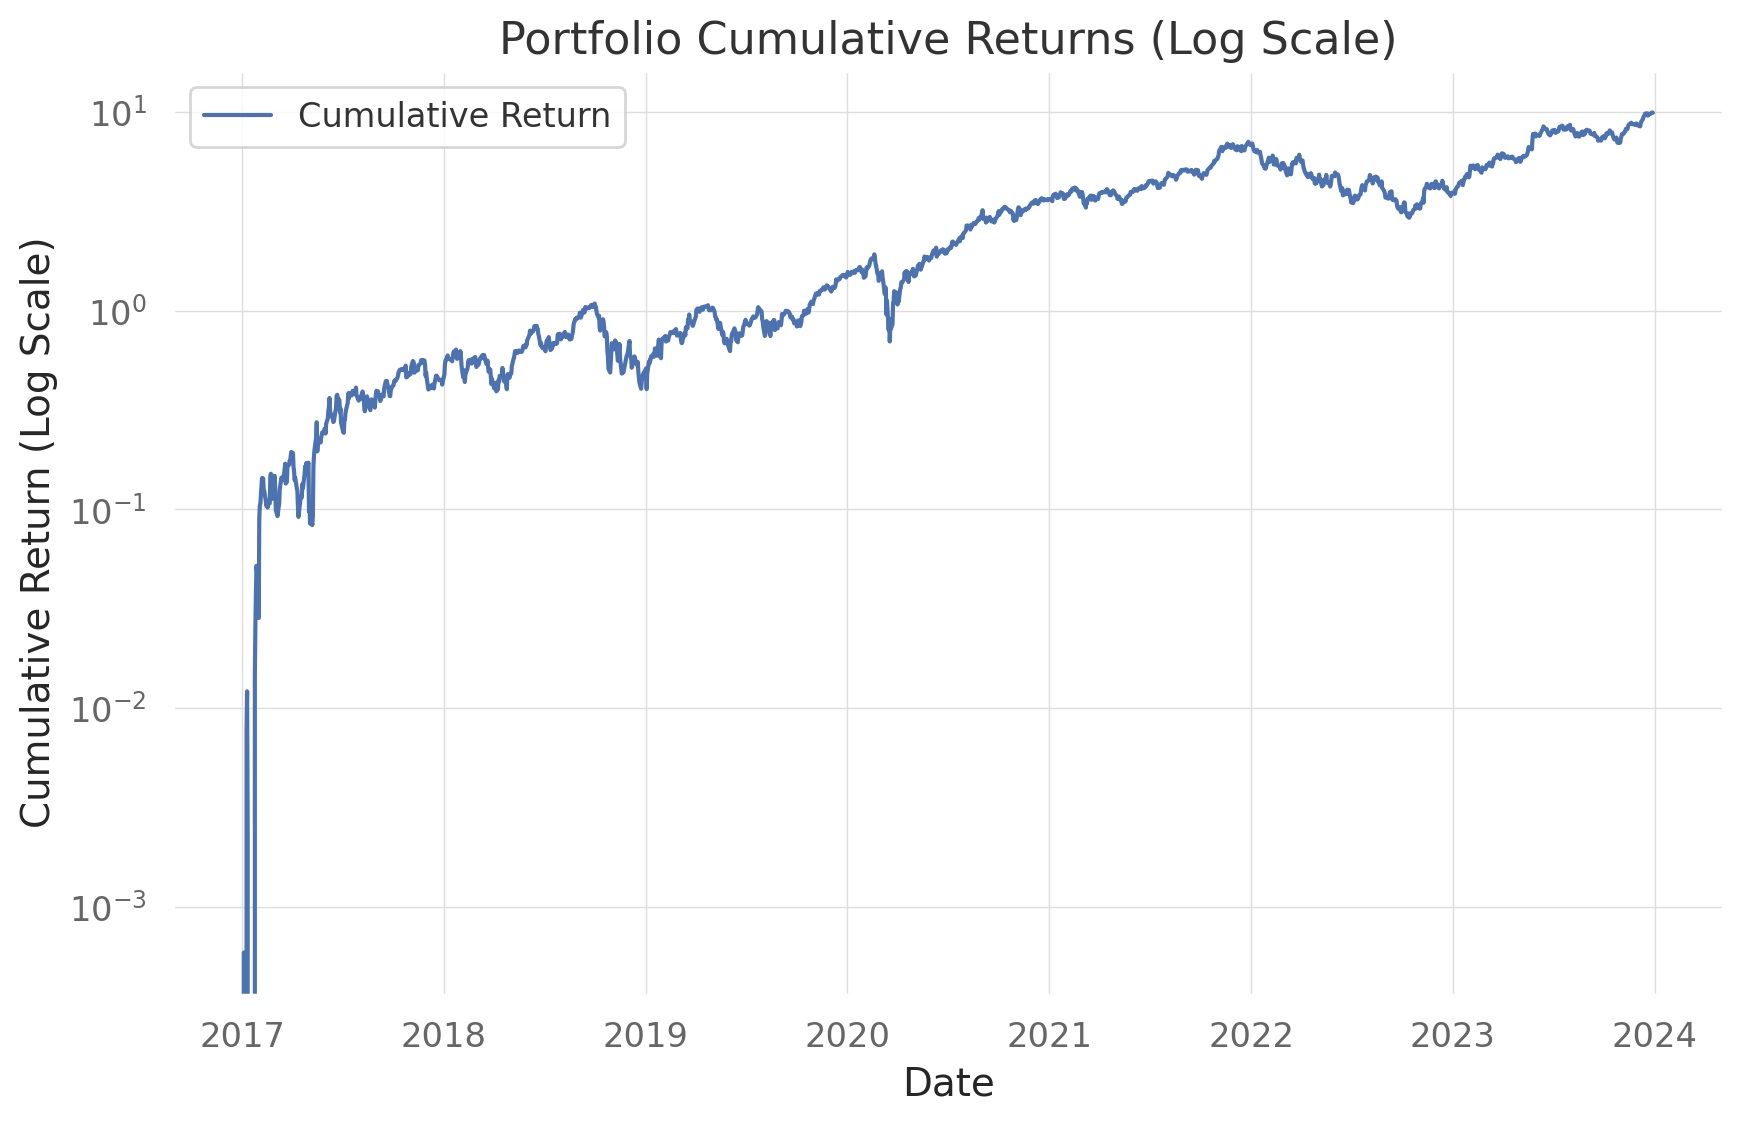

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label='Cumulative Return', color='b')
plt.yscale('log')  # Change to logarithmic scale
plt.title('Portfolio Cumulative Returns (Log Scale)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return (Log Scale)', fontsize=14)
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.grid(True)
plt.legend()
plt.show()


Rolling Sharpe Ratio:

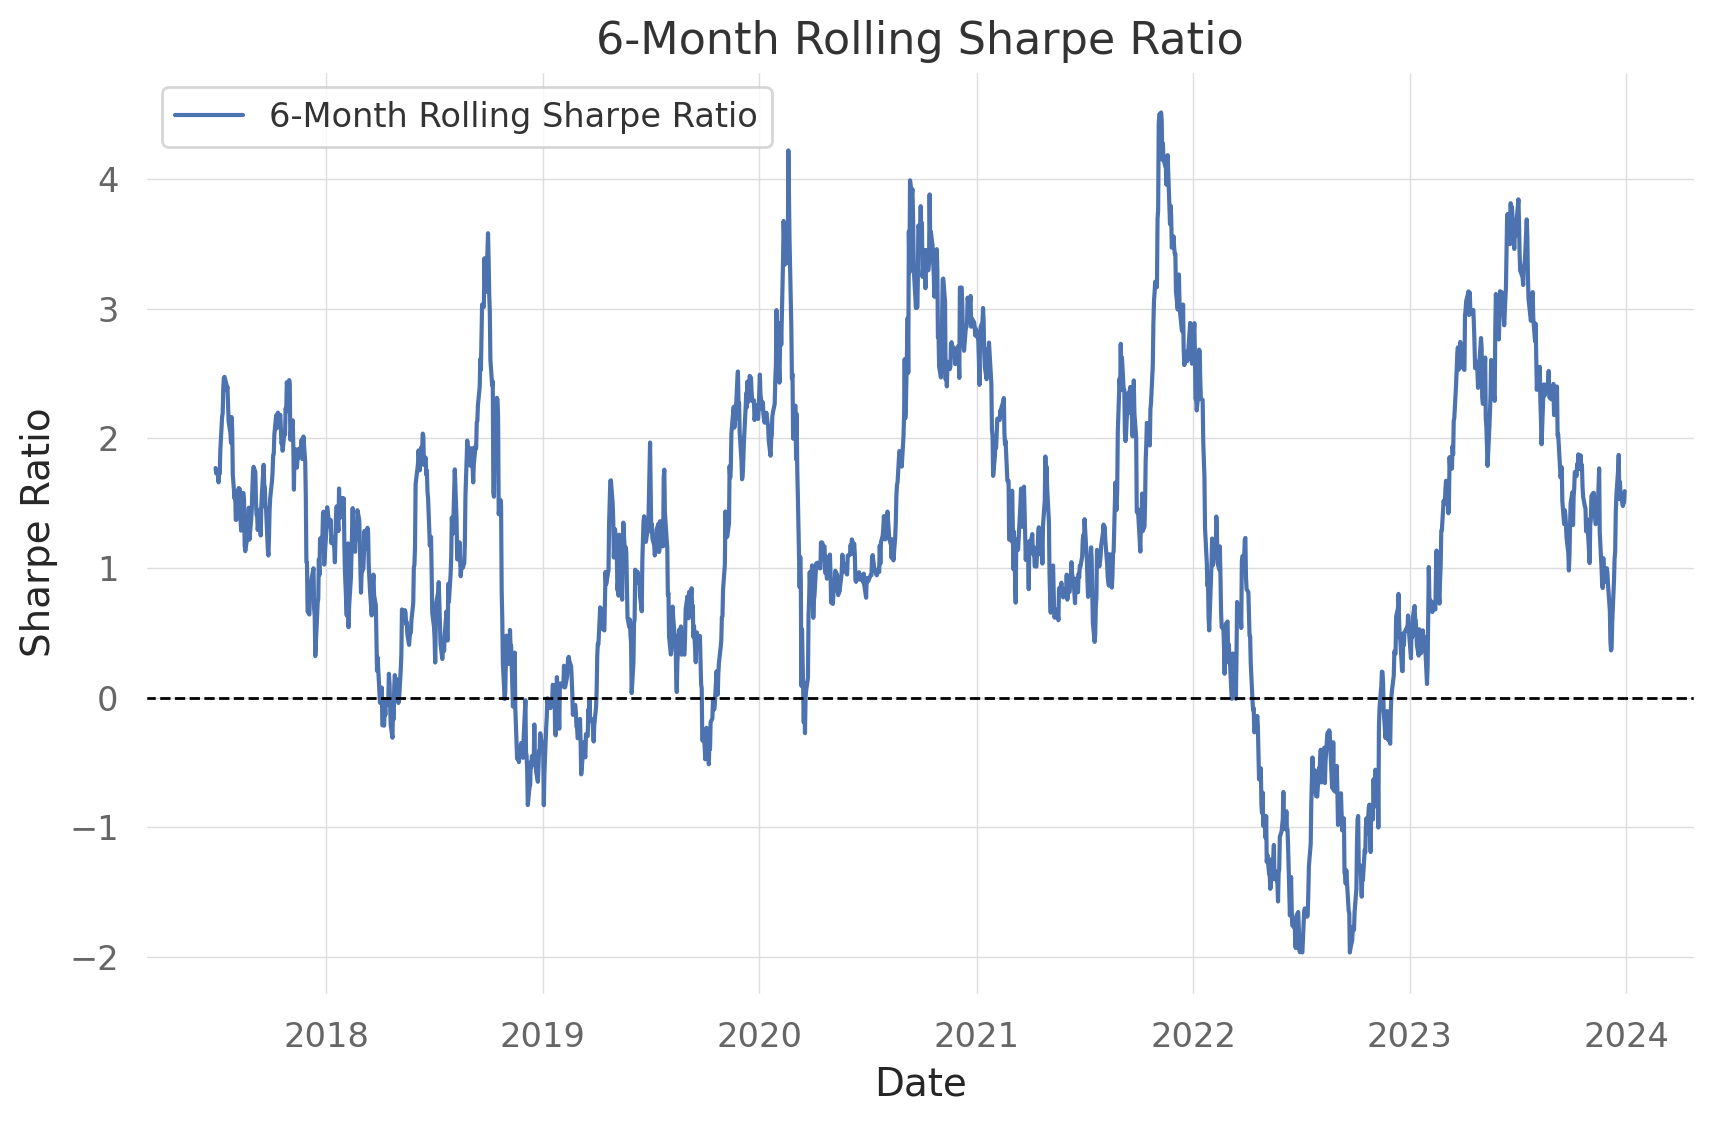

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'portfolio_returns' is a pandas Series of daily returns
# Portfolio returns as a pandas Series, e.g., portfolio_returns = pd.Series(...)

# Define the rolling window (6 months)
window = 6 * 21  # 6 months with 21 trading days per month (approximately 126 days)

# Calculate the rolling mean (average return) and standard deviation (volatility) for the Sharpe ratio
rolling_mean = portfolio_returns.rolling(window=window).mean()
rolling_volatility = portfolio_returns.rolling(window=window).std()

# Calculate the Sharpe Ratio for each rolling window
rolling_sharpe_ratio = rolling_mean / rolling_volatility * np.sqrt(252)  # Annualized Sharpe ratio

# Plot the rolling Sharpe ratio
plt.figure(figsize=(10, 6))
plt.plot(rolling_sharpe_ratio, label='6-Month Rolling Sharpe Ratio', color='b')

# Customize the plot
plt.title('6-Month Rolling Sharpe Ratio', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sharpe Ratio', fontsize=14)
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.grid(True)
plt.legend()
plt.show()

Underwater Plot

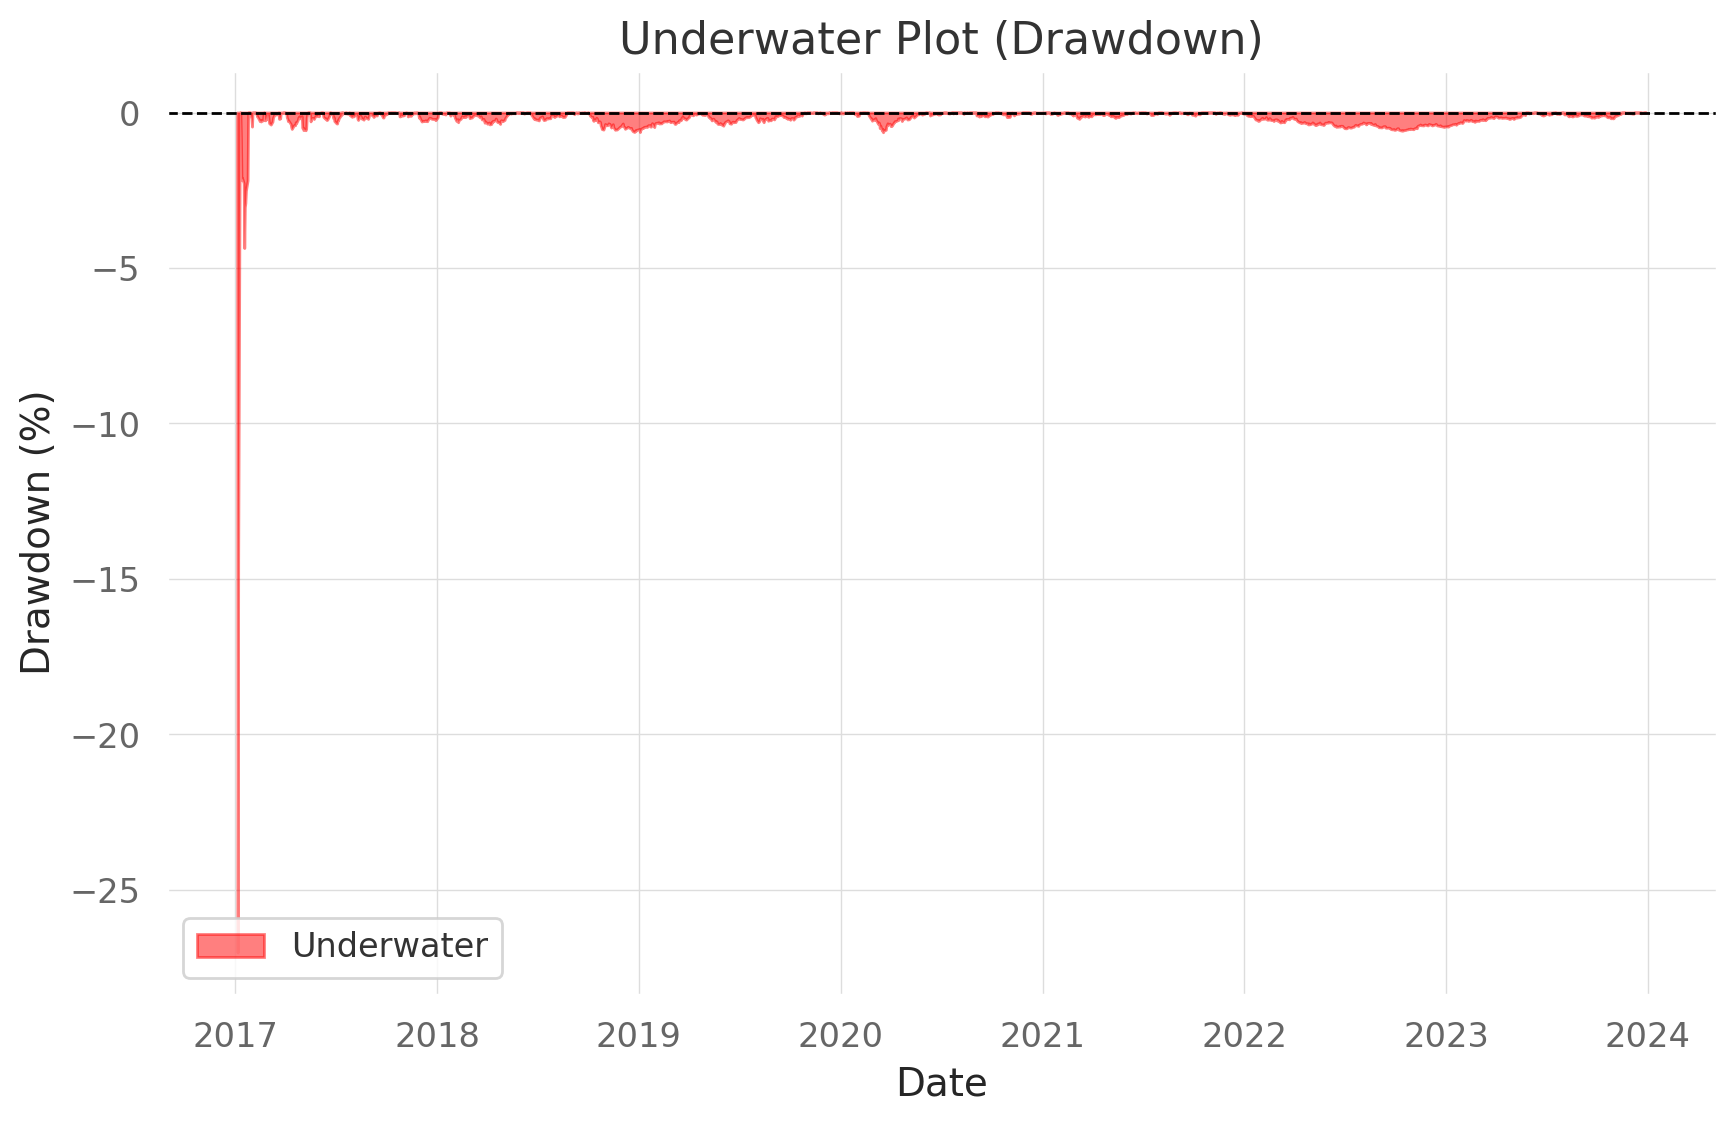

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'portfolio_returns' is a pandas Series of daily returns
# Example of portfolio returns as a pandas Series, e.g., portfolio_returns = pd.Series(...)

# Calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod() - 1

# Calculate running maximum (peak) of cumulative returns
running_max = cumulative_returns.cummax()

# Calculate drawdown (percentage drop from the running maximum)
drawdown = (cumulative_returns - running_max) / running_max

# Plot the underwater plot (drawdown)
plt.figure(figsize=(10, 6))
plt.fill_between(drawdown.index, drawdown, color='red', alpha=0.5, label='Underwater')

# Customize the plot
plt.title('Underwater Plot (Drawdown)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Drawdown (%)', fontsize=14)
plt.axhline(0, color='black', linewidth=1, linestyle='--')  # Baseline (0% drawdown)
plt.grid(True)
plt.legend()
plt.show()

#Finding the Efficient Frontier using Monte Carlo simulations

In [47]:
import yfinance as yf
import numpy as np
import pandas as pd

N_PORTFOLIOS = 10 ** 5
N_DAYS = 252
RISKY_ASSETS = ['BDMN.JK', 'BBCA.JK', 'ANTM.JK', 'ISAT.JK']
RISKY_ASSETS.sort()
START_DATE = '2018-01-01'
END_DATE = '2023-12-31'

n_assets = len(RISKY_ASSETS)

In [49]:
prices_df = yf.download(RISKY_ASSETS, start=START_DATE, end=END_DATE)
print(f'Downloaded {prices_df.shape[0]} rows of data.')

[*********************100%***********************]  4 of 4 completed

Downloaded 1493 rows of data.


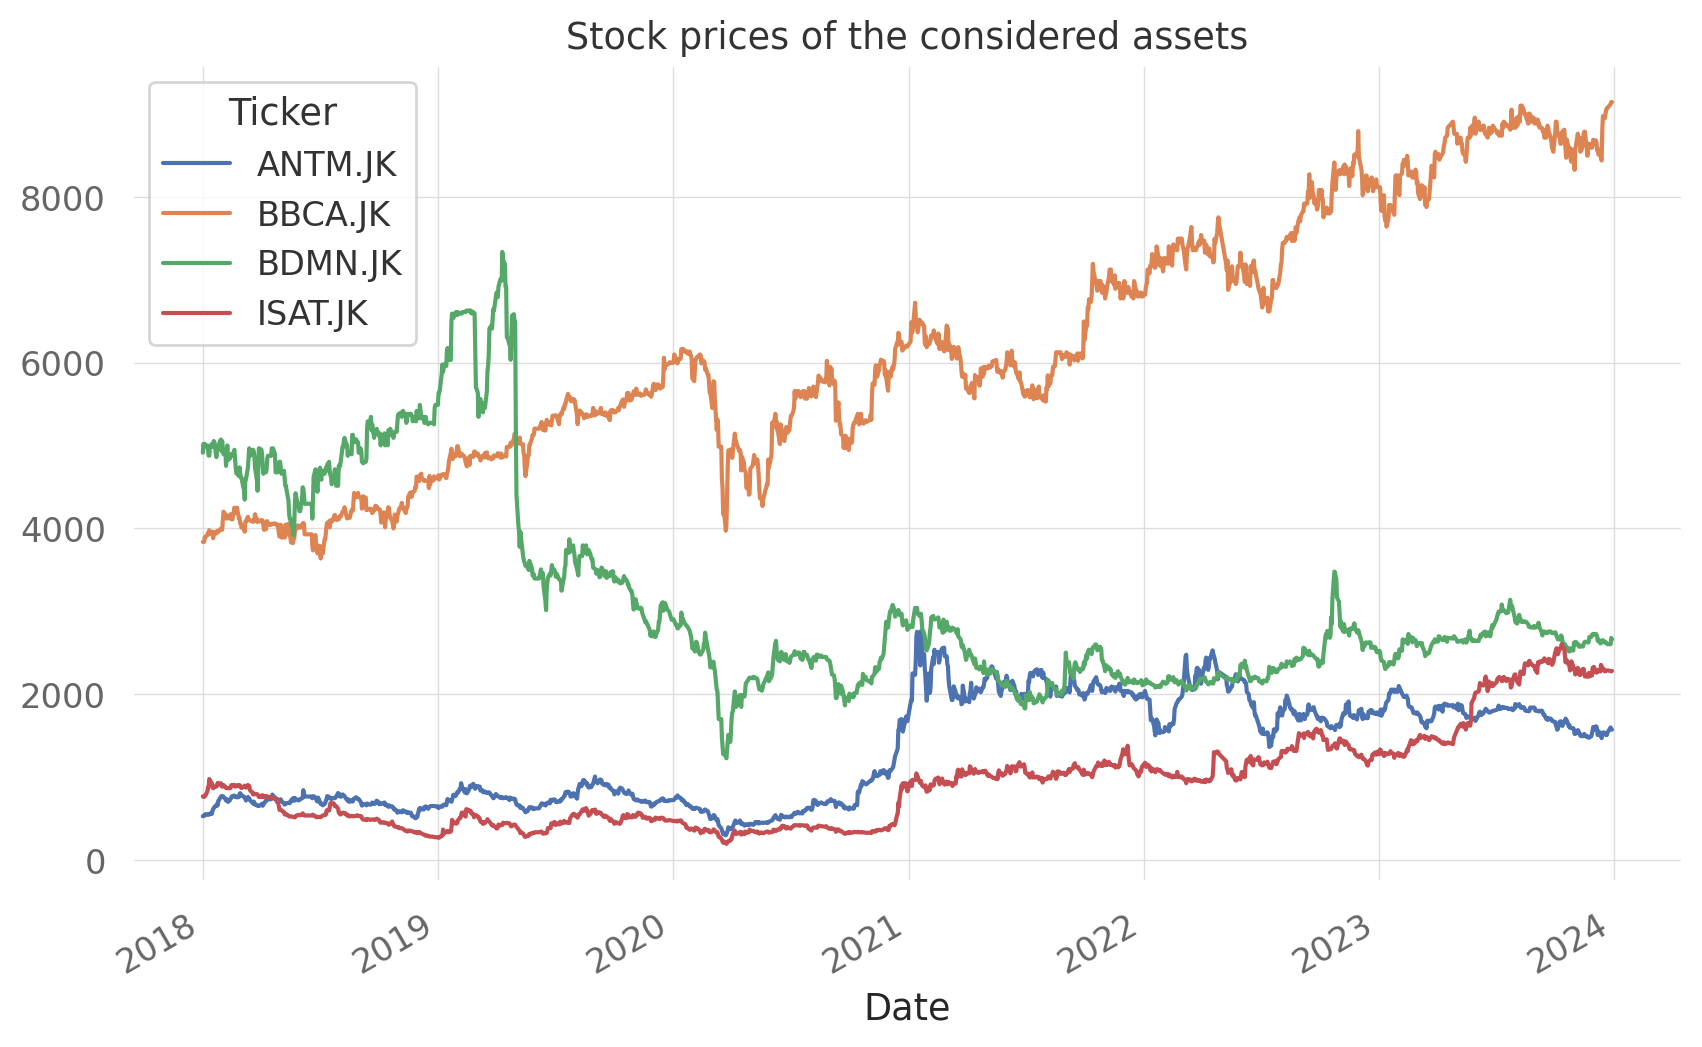

In [50]:
prices_df['Adj Close'].plot(title='Stock prices of the considered assets');

Calculate annualized average returns and the corresponding standard deviation:

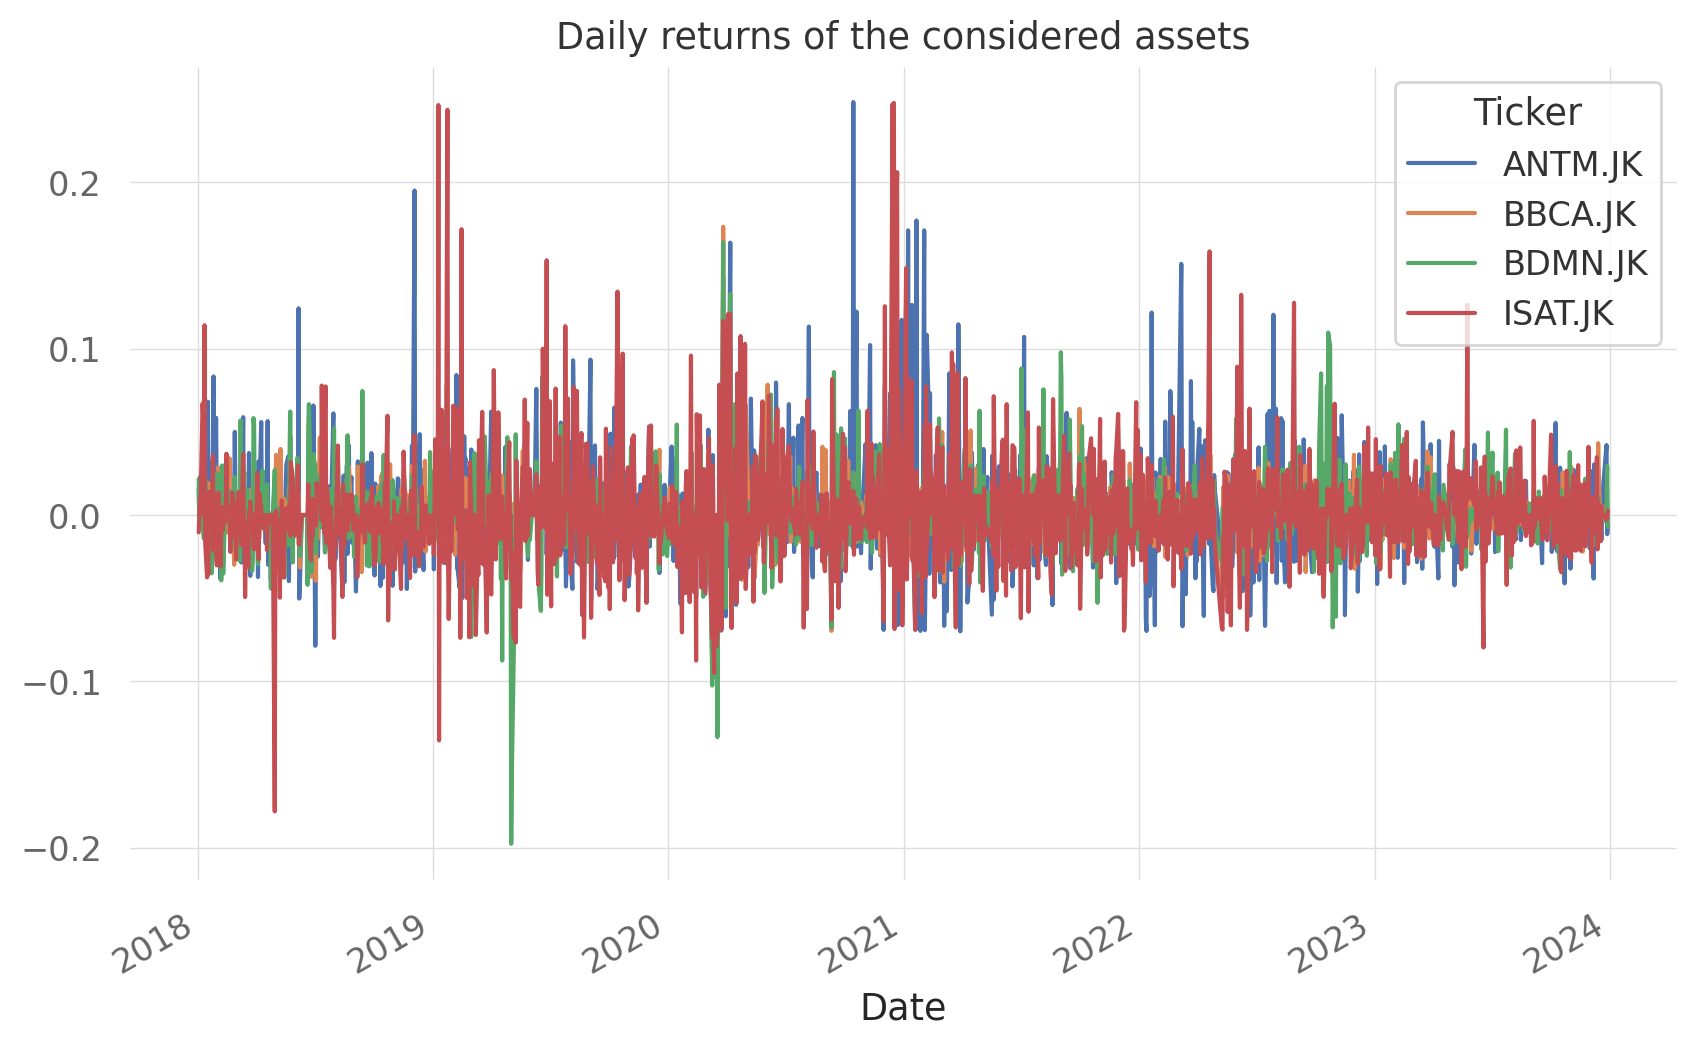

In [51]:
returns_df = prices_df['Adj Close'].pct_change().dropna()

avg_returns = returns_df.mean() * N_DAYS
cov_mat = returns_df.cov() * N_DAYS
returns_df.plot(title='Daily returns of the considered assets');

Simulate random portfolio weights:

In [52]:
np.random.seed(42)
weights = np.random.random(size=(N_PORTFOLIOS, n_assets))
weights /=  np.sum(weights, axis=1)[:, np.newaxis]

Calculate portfolio metrics:

In [53]:
portf_rtns = np.dot(weights, avg_returns)

portf_vol = []
for i in range(0, len(weights)):
    portf_vol.append(np.sqrt(np.dot(weights[i].T,
                                   np.dot(cov_mat, weights[i]))))
portf_vol = np.array(portf_vol)
portf_sharpe_ratio = portf_rtns / portf_vol

Create a joint DataFrame with all data:

In [54]:
portf_results_df = pd.DataFrame({'returns': portf_rtns,
                                'volatility': portf_vol,
                                'sharpe_ratio': portf_sharpe_ratio})

Locate the points creating the Efficient Frontier:

In [55]:
N_POINTS = 100
portf_vol_ef = []
indices_to_skip = []

portf_rtns_ef = np.linspace(portf_results_df.returns.min(),
                           portf_results_df.returns.max(),
                           N_POINTS)
portf_rtns_ef = np.round(portf_rtns_ef, 2)
portf_rtns = np.round(portf_rtns, 2)

for point_index in range(N_POINTS):
    if portf_rtns_ef[point_index] not in portf_rtns:
        indices_to_skip.append(point_index)
        continue
    matched_ind = np.where(portf_rtns == portf_rtns_ef[point_index])
    portf_vol_ef.append(np.min(portf_vol[matched_ind]))

portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip)

Plot the Efficient Frontier:

<ipython-input-57-0c9c1ae4b9ee>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y=avg_returns[asset_index],


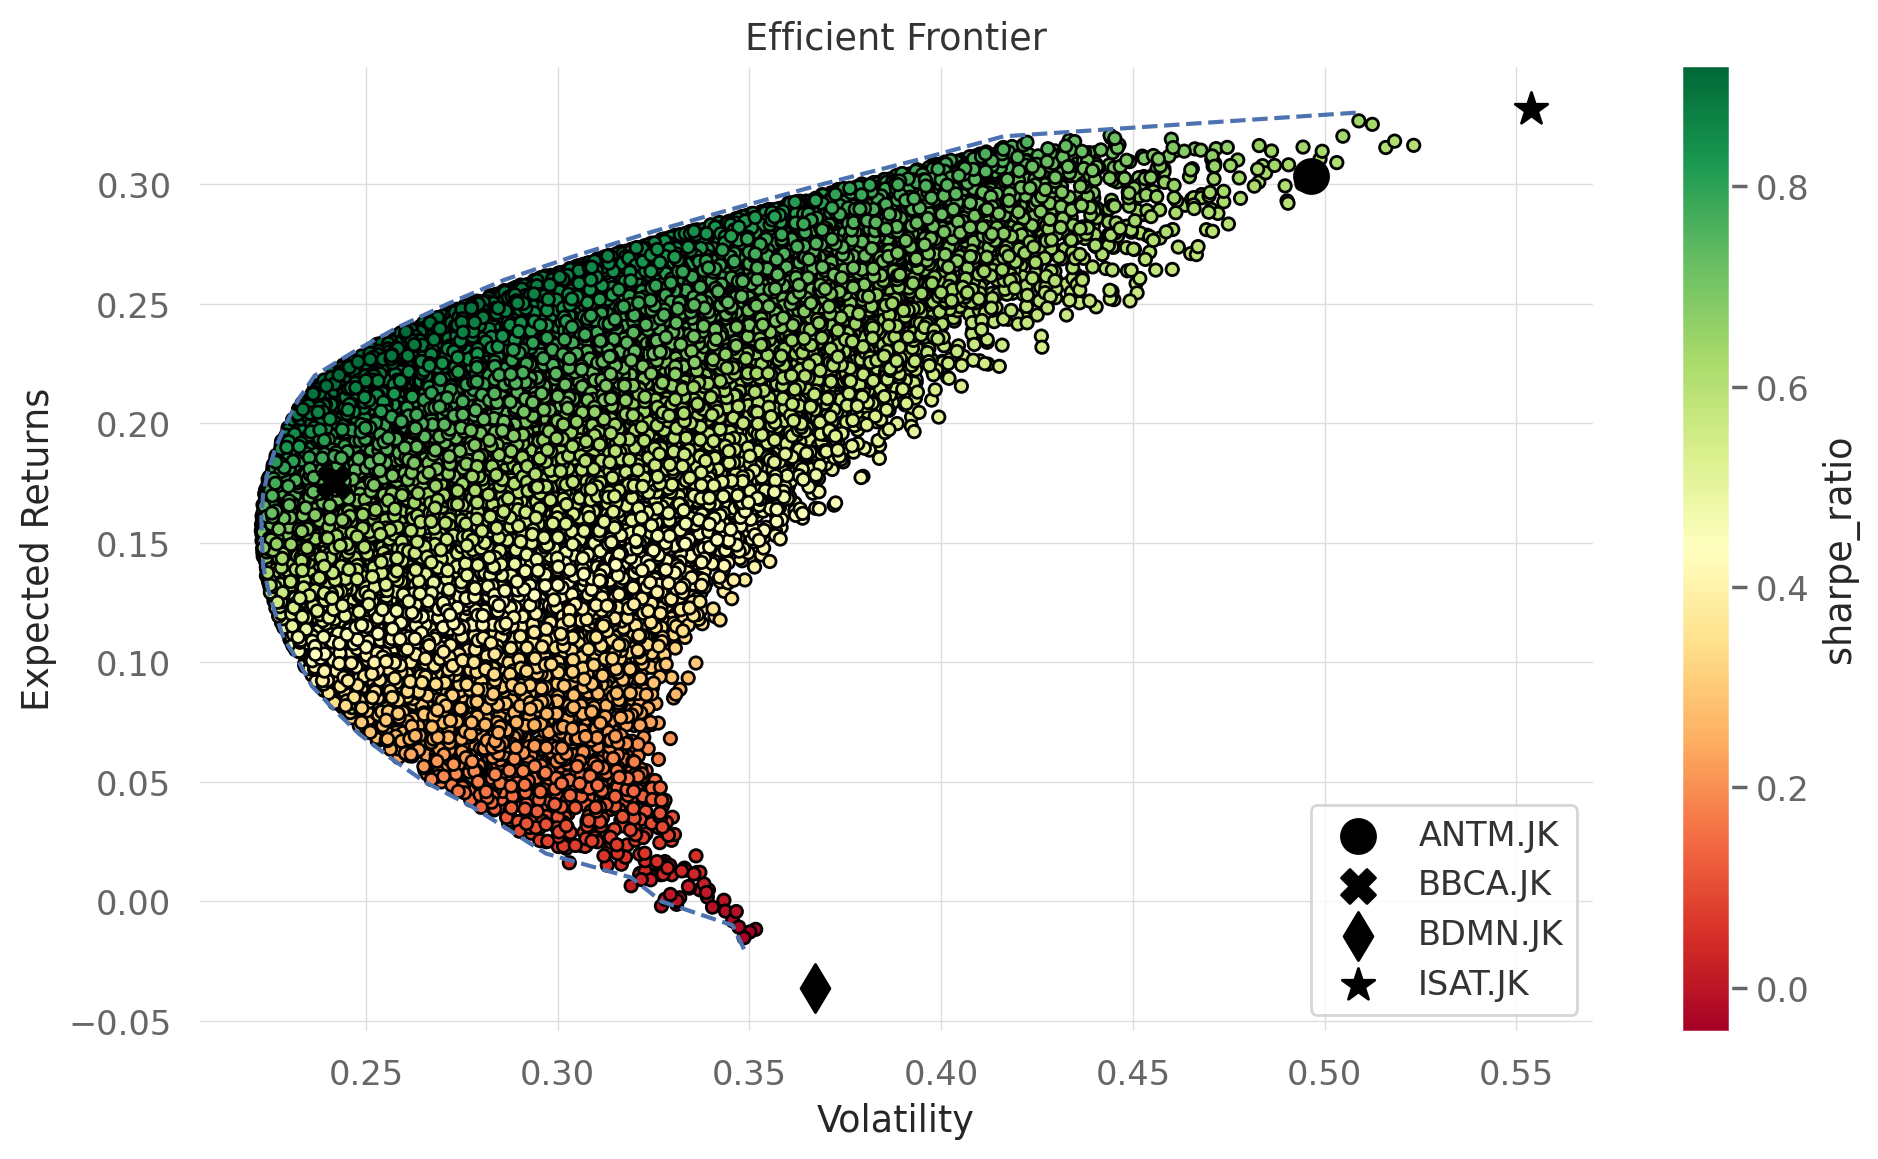

In [57]:
MARKS = ['o', 'X', 'd', '*']

fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility',
                     y='returns', c='sharpe_ratio',
                     cmap='RdYlGn', edgecolors='black',
                     ax=ax)
ax.set(xlabel='Volatility',
      ylabel='Expected Returns',
      title='Efficient Frontier')
ax.plot(portf_vol_ef, portf_rtns_ef, 'b--')
for asset_index in range(n_assets):
    ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]),
              y=avg_returns[asset_index],
              marker=MARKS[asset_index],
              s=150,
              color='black',
              label=RISKY_ASSETS[asset_index])
ax.legend()

plt.tight_layout()
plt.show()

#Finding the Efficient Frontier using optimization with scipy

Finding the Efficient Frontier using optimization with scipy

In [58]:
import numpy as np
import scipy.optimize as sco

Define functions calculating portfolio returns and volatility:

In [59]:
def get_portf_rtn(w, avg_rtns):
    return np.sum(avg_rtns * w)

def get_portf_vol(w, avg_rtns, cov_mat):
    return np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))

Define the function calculating the efficient frontier:

In [60]:
def get_efficient_frontier(avg_rtns, cov_mat, rtns_range):

    efficient_portfolios = []

    n_assets = len(avg_returns)
    args = (avg_returns, cov_mat)
    bounds = tuple((0,1) for asset in range(n_assets))
    initial_guess = n_assets * [1. / n_assets, ]

    for ret in rtns_range:
        constraints = ({'type': 'eq',
                       'fun': lambda x: get_portf_rtn(x, avg_rtns) - ret},
                      {'type': 'eq',
                      'fun': lambda x: np.sum(x) - 1})
        efficient_portfolio = sco.minimize(get_portf_vol, initial_guess,
                                          args=args, method='SLSQP',
                                          constraints=constraints,
                                          bounds=bounds)
        efficient_portfolios.append(efficient_portfolio)

    return efficient_portfolios

Define the considered range of returns:

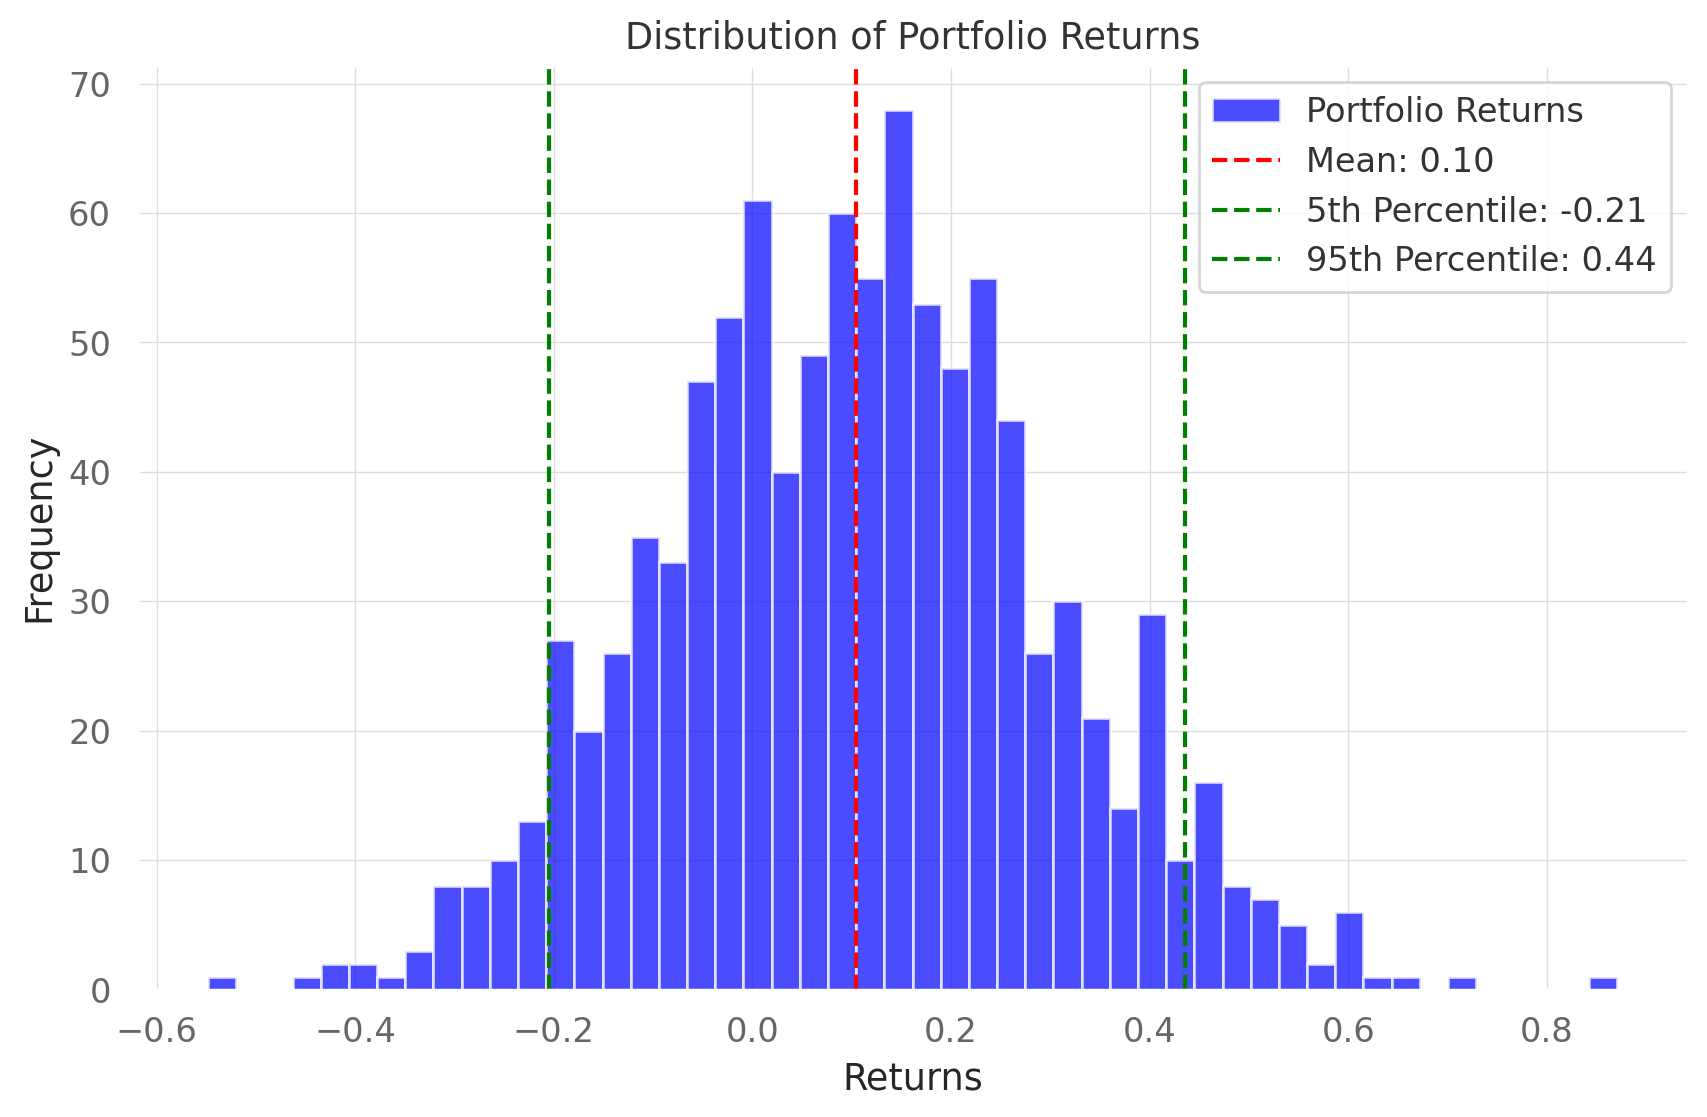

Mean Return: 0.10
Standard Deviation: 0.20
Range based on mean ± 3*std: -0.48 to 0.69
Range based on 5th to 95th percentile: -0.21 to 0.44


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example: Simulating portfolio returns as a random walk (replace this with your actual portfolio returns)
np.random.seed(42)  # For reproducibility
portfolio_returns = np.random.normal(loc=0.1, scale=0.2, size=1000)  # mean=10%, std=20%

# Step 1: Calculate the mean and standard deviation of the returns
mean_return = np.mean(portfolio_returns)
std_return = np.std(portfolio_returns)

# Step 2: Define a reasonable range of returns
# Option 1: Based on mean ± 3 * standard deviation (typically covers 99.7% for normal distributions)
rtns_range_1 = np.linspace(mean_return - 3*std_return, mean_return + 3*std_return, 200)

# Option 2: Based on percentiles (5th to 95th percentile)
lower_percentile = np.percentile(portfolio_returns, 5)
upper_percentile = np.percentile(portfolio_returns, 95)
rtns_range_2 = np.linspace(lower_percentile, upper_percentile, 200)

# Step 3: Plot the distribution of returns to visualize
plt.figure(figsize=(10, 6))
plt.hist(portfolio_returns, bins=50, alpha=0.7, label="Portfolio Returns", color='blue')
plt.axvline(mean_return, color='red', linestyle='--', label=f"Mean: {mean_return:.2f}")
plt.axvline(lower_percentile, color='green', linestyle='--', label=f"5th Percentile: {lower_percentile:.2f}")
plt.axvline(upper_percentile, color='green', linestyle='--', label=f"95th Percentile: {upper_percentile:.2f}")
plt.title("Distribution of Portfolio Returns")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Printing out the chosen range for inspection
print(f"Mean Return: {mean_return:.2f}")
print(f"Standard Deviation: {std_return:.2f}")
print(f"Range based on mean ± 3*std: {rtns_range_1[0]:.2f} to {rtns_range_1[-1]:.2f}")
print(f"Range based on 5th to 95th percentile: {rtns_range_2[0]:.2f} to {rtns_range_2[-1]:.2f}")

I choose to run based on 5th to 95th percentile
(focuses on the central portion of the data and avoids extreme outliers, the purpose is to focus on typical returns (without extreme values), use this range.)

In [66]:
rtns_range = np.linspace(-0.21, 0.44, 200)

Calculate the Efficient Frontier:

In [67]:
efficient_portfolios = get_efficient_frontier(avg_returns,
                                             cov_mat,
                                             rtns_range)

Extract the volatilities of the efficient portfolios:

In [68]:
vols_range = [x['fun'] for x in efficient_portfolios]

Plot the calculated Efficient Frontier, together with the simulated portfolios:

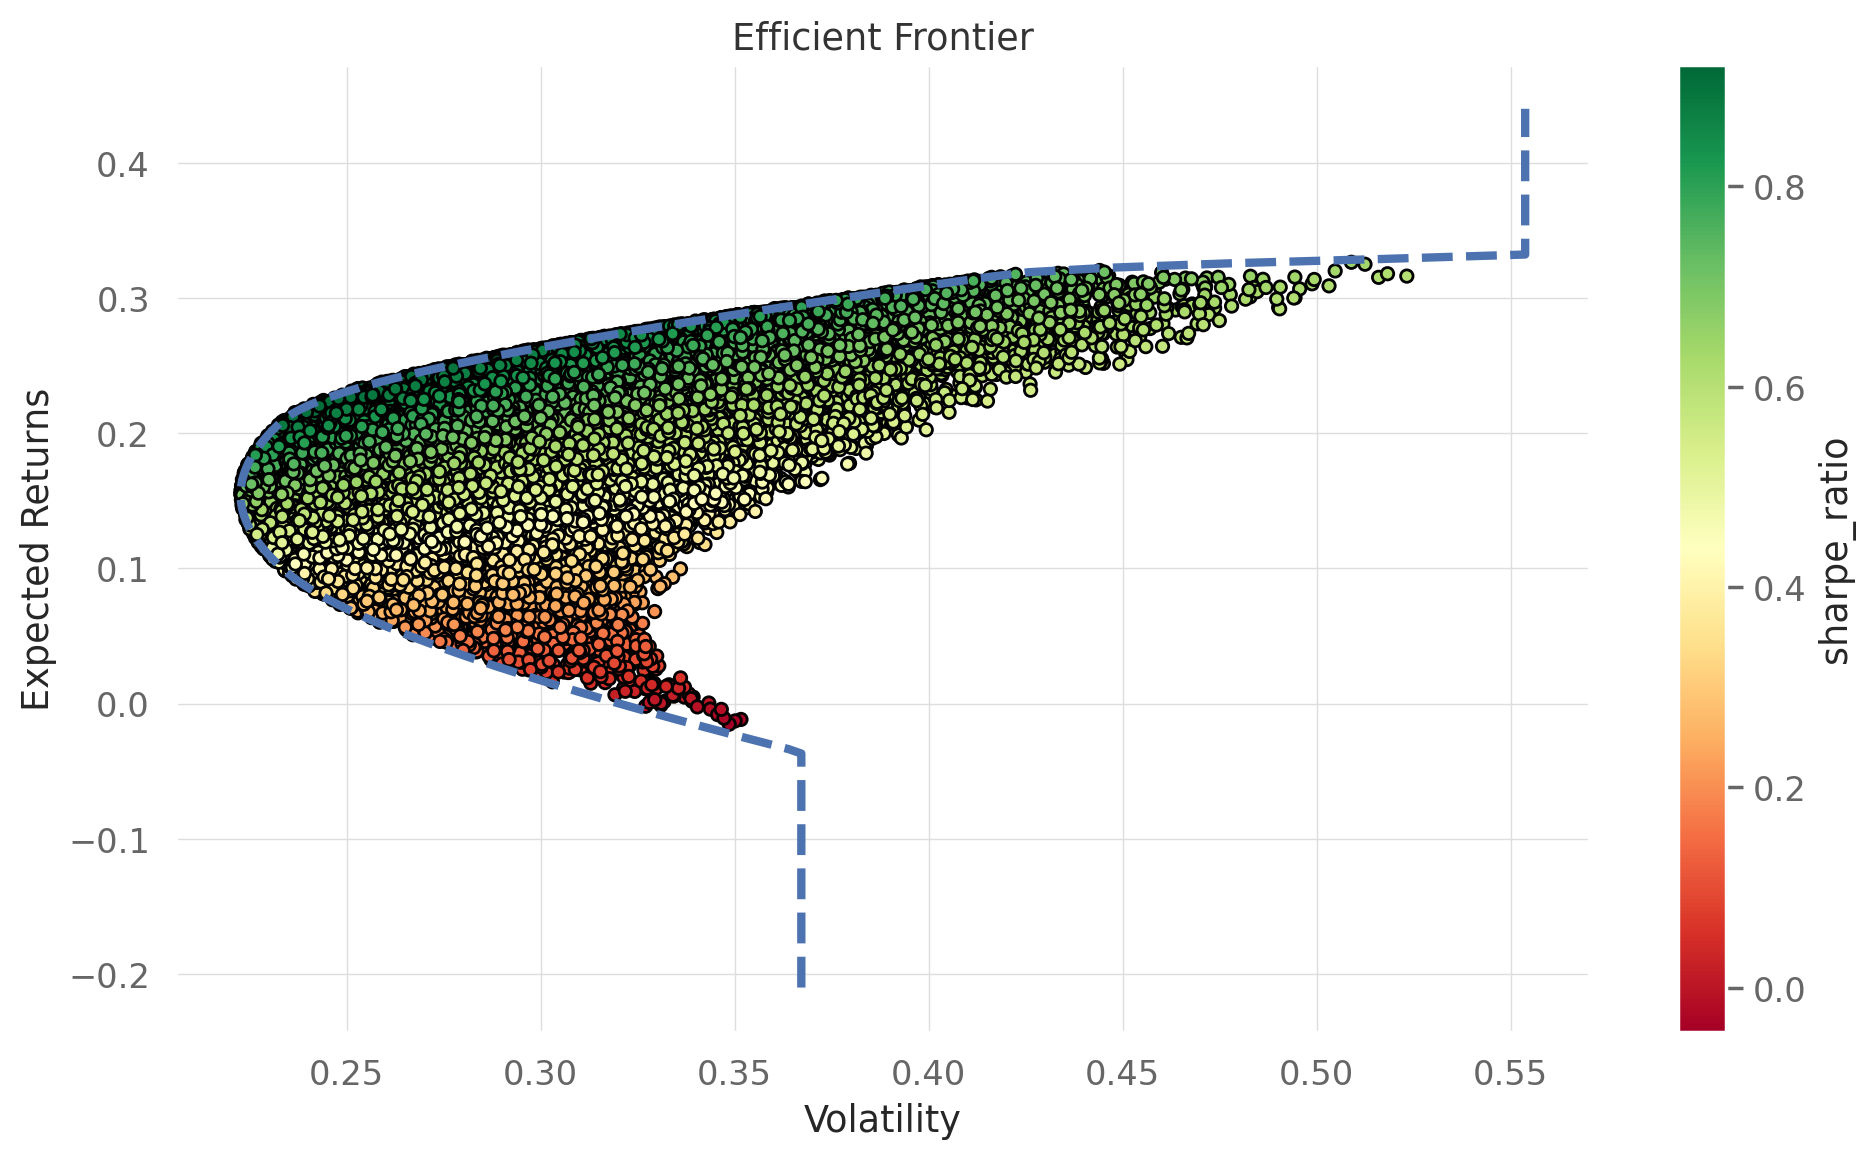

In [69]:
fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility',
                     y='returns', c='sharpe_ratio',
                     cmap='RdYlGn', edgecolors='black',
                     ax=ax)
ax.plot(vols_range, rtns_range, 'b--', linewidth=3)
ax.set(xlabel='Volatility',
      ylabel='Expected Returns',
      title='Efficient Frontier')

plt.tight_layout()
plt.show()

Identify the minimum volatility portfolio:

In [70]:
min_vol_ind = np.argmin(vols_range)
min_vol_portf_rtn = rtns_range[min_vol_ind]
min_vol_portf_vol = efficient_portfolios[min_vol_ind]['fun']

min_vol_portf = {'Return': min_vol_portf_rtn,
                'Volatility': min_vol_portf_vol,
                'Sharpe Ratio': (min_vol_portf_rtn /
                                min_vol_portf_vol)}

min_vol_portf

{'Return': 0.15582914572864323,
 'Volatility': 0.22264064762024333,
 'Sharpe Ratio': 0.6999132790632193}

Print performance summary:

In [71]:
print('Minimum Volatility portfolio ----')
print('Performance')

for index, value in min_vol_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)

print('\nWeights')
for x, y in zip(RISKY_ASSETS, efficient_portfolios[min_vol_ind]['x']):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Minimum Volatility portfolio ----
Performance
Return: 15.58% Volatility: 22.26% Sharpe Ratio: 69.99% 
Weights
ANTM.JK: 6.72% BBCA.JK: 70.19% BDMN.JK: 17.50% ISAT.JK: 5.59% 